# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

-> Importando as bibliotecas necessárias para executar o projeto.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

-> Leitura do arquivo e verificação se há dados faltantes nas variáveis.

In [36]:
df = pd.read_csv('demo_base_limpa_01.csv')
df.isna().sum()

Unnamed: 0                                0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo_M                                    0
posse_de_veiculo_Y                        0
posse_de_imovel_Y                         0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated          

-> Determinando as variáveis e inserindo as variáveis flag na coluna "Mau".

In [3]:
df = pd.read_csv('demo_base_limpa_01.csv')

y = df['mau']
y.replace({True: 1, False: 0}, inplace=True)

X = df.drop('mau', axis=1)
y.value_counts()

0    16260
1      390
Name: mau, dtype: int64

-> Verificando a categoria dos dados de cada var

In [4]:
df.dtypes

Unnamed: 0                                  int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
sexo_M                                      int64
posse_de_veiculo_Y                          int64
posse_de_imovel_Y                           int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

-> Definição do objeto com a função da árvore de decisão.

In [37]:
y = df.mau
X = df.drop('mau', axis=1)

-> Separando 70% da base para treino e 30% para teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

-> Treinando o modelo com os dados para o "treinamento" da base.

In [10]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(random_state=100)

-> Visualização da árvore de decisão, podemos observar que ela está com um overfitting

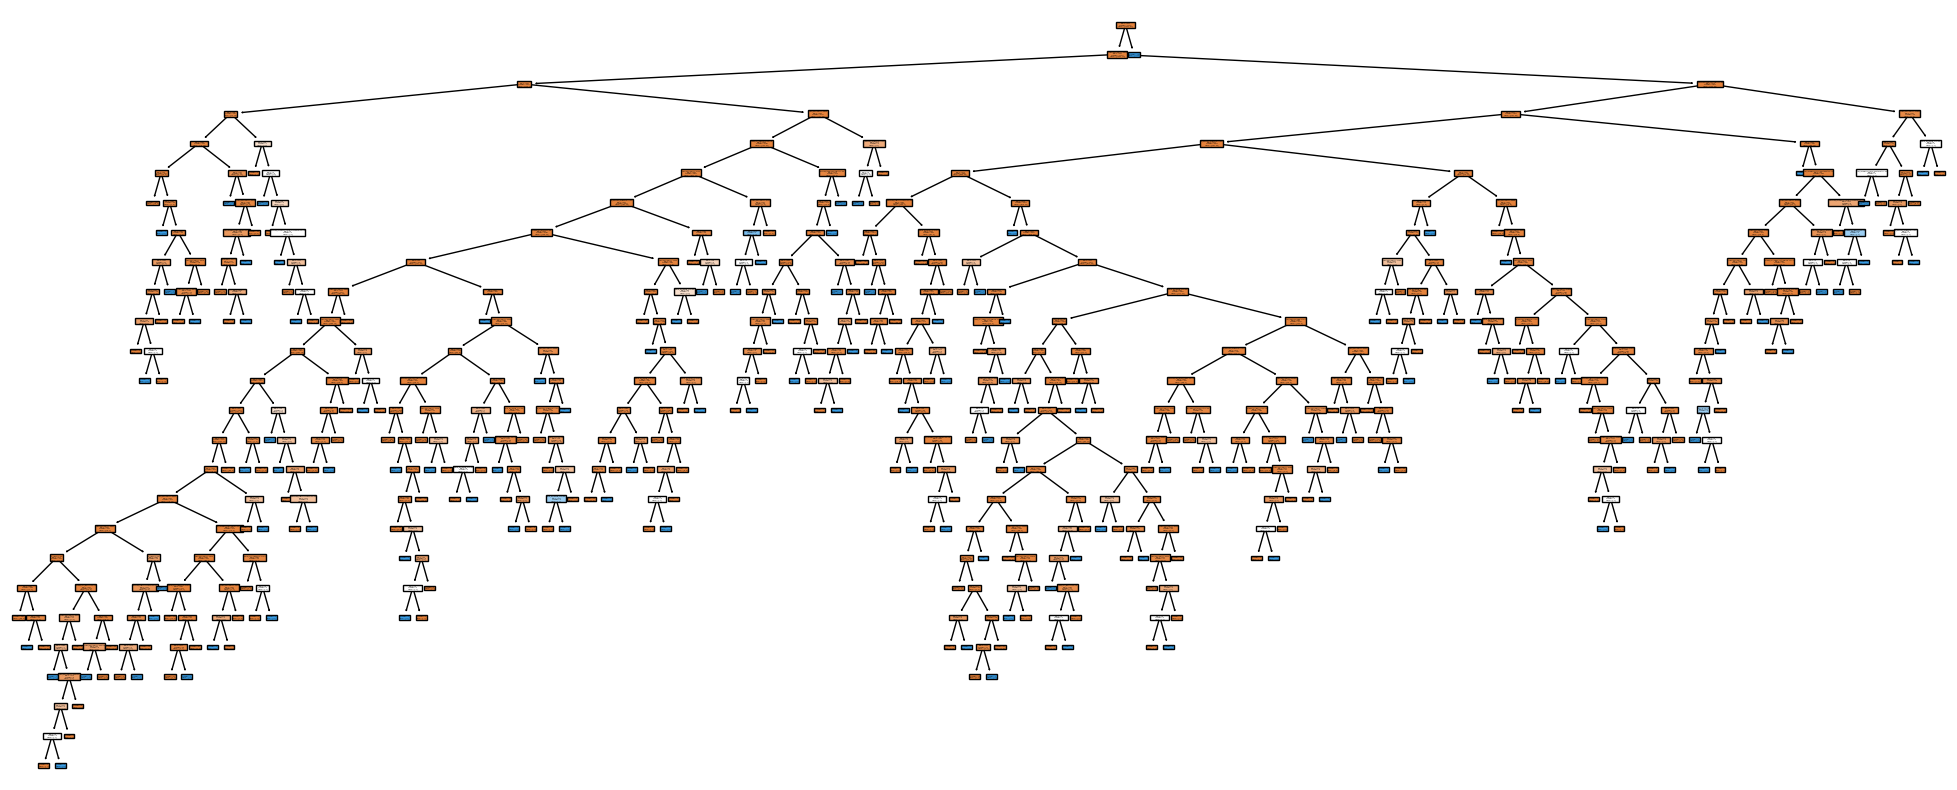

In [18]:
plt.figure(figsize=(25, 10))
plot_tree(clf, feature_names = X_train.columns.tolist(), filled = True);

-> Verificando o "tamanho" da base de treinamento.

In [8]:
X_train.shape

(11655, 29)

-> Produção e visualização da matriz de confusão da base de treinamento.

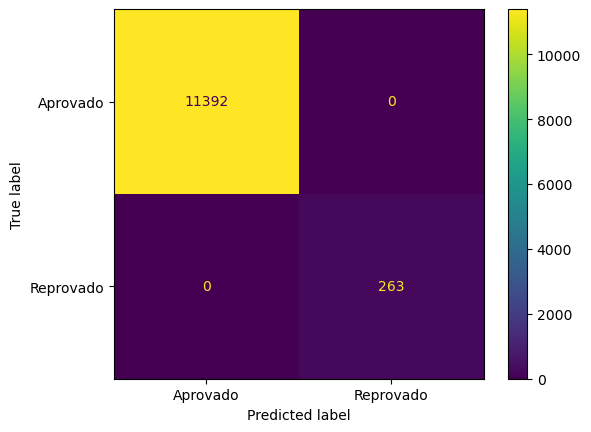

In [21]:
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['Aprovado', 'Reprovado'])
plt.show()

-> Verificando a acurácia da base de treinamento.

In [12]:
predict_01 = clf.predict(X_train)
predict_01

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
accuracy_score(y_train, predict_01)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

-> Verificando o "tamanho" da base de teste.

In [9]:
X_test.shape

(4995, 29)

-> Produção e visualização da matriz de confusão da base de teste.

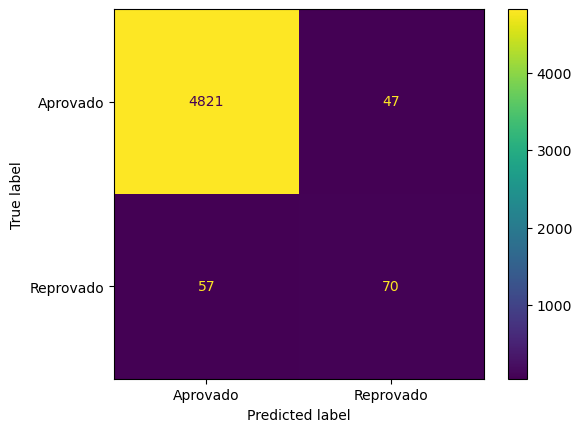

In [22]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Aprovado', 'Reprovado'])
plt.show()

-> Verificando a acurácia da base de teste.

In [23]:
predict_02 = clf.predict(X_test)
predict_02

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
accuracy_score(y_test, predict_02)

0.9791791791791792

-> Treinando a nova árvore, com o random_state=123, observação de 5 folhas e profundidade máxima de 10.

In [26]:
clf_train = DecisionTreeClassifier(random_state=123)
clf_train = clf.fit(X_test, y_test)
clf_train

DecisionTreeClassifier(random_state=123)

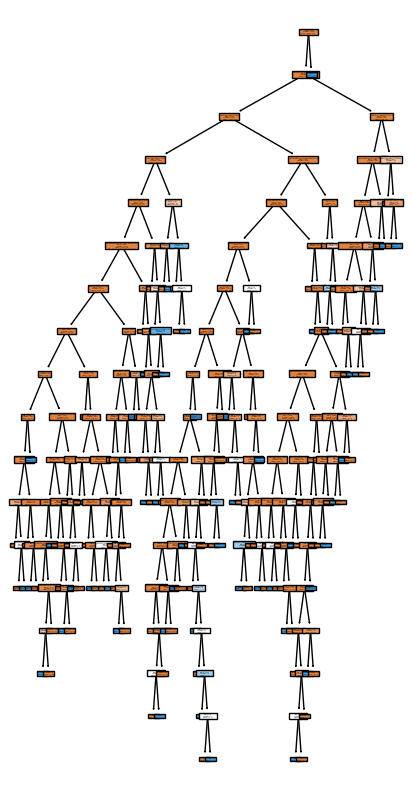

In [27]:
plt.figure(figsize=(5, 10))
plot_tree(clf_train, feature_names = X_test.columns.tolist(), filled = True);

-> Observação da distribuição da predição, relação da proporção de proponentes classificados como maus?

-> Resposta: Concluimos que, a considerar o score do modelo de treino, acuracidade de 1.0, e a base teste de 0.92, a base de teste se mostra um bom instrumento para avaliação de proponentes.

-> Cenário se a classificação de todos os contratos fossem considerados como 'bons'

In [28]:
df_2= pd.read_csv('demo_base_limpa_01.csv')

y_2 = df_2['mau']
y_2.replace({True: 1, False: 1}, inplace=True)

X_2 = df_2.drop('mau', axis=1)
y_2.value_counts()

1    16650
Name: mau, dtype: int64

In [29]:
y_2=df_2.mau

In [30]:
X_2 = df_2.drop('mau', axis=1)

In [31]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=100)

In [32]:
clf_2 = DecisionTreeClassifier(random_state=100)
clf_2 = clf_2.fit(X_2_train, y_2_train)
clf_2

DecisionTreeClassifier(random_state=100)

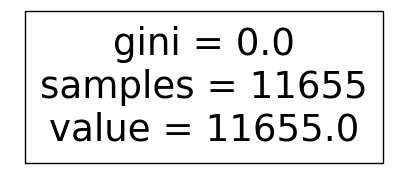

In [39]:
plt.figure(figsize=(5, 2))
plot_tree(clf_2, feature_names = X_2_train.columns.tolist(), filled = True);

In [34]:
predict_03 = clf_2.predict(X_2_test)
predict_03

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [35]:
accuracy_score(y_2_test, predict_03)

1.0